<!-- Autogenerated by `scripts/make_examples.py` -->
<table align="left">
    <td>
        <a target="_blank" href="https://colab.research.google.com/github/voxel51/fiftyone-examples/blob/master/examples/Polylines.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791629-6e618700-5769-11eb-857f-d176b37d2496.png" height="32" width="32">
            Try in Google Colab
        </a>
    </td>
    <td>
        <a target="_blank" href="https://nbviewer.jupyter.org/github/voxel51/fiftyone-examples/blob/master/examples/Polylines.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791634-6efa1d80-5769-11eb-8a4c-71d6cb53ccf0.png" height="32" width="32">
            Share via nbviewer
        </a>
    </td>
    <td>
        <a target="_blank" href="https://github.com/voxel51/fiftyone-examples/blob/master/examples/Polylines.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791633-6efa1d80-5769-11eb-8ee3-4b2123fe4b66.png" height="32" width="32">
            View on GitHub
        </a>
    </td>
    <td>
        <a href="https://github.com/voxel51/fiftyone-examples/raw/master/examples/Polylines.ipynb" download>
            <img src="https://user-images.githubusercontent.com/25985824/104792428-60f9cc00-576c-11eb-95a4-5709d803023a.png" height="32" width="32">
            Download notebook
        </a>
    </td>
</table>


In [50]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset(
    "quickstart",
    dataset_name="polylines"

)

Dataset already downloaded
Loading 'quickstart'
 100% |█████████████████| 200/200 [2.5s elapsed, 0s remaining, 77.9 samples/s]       
Dataset 'polylines' created



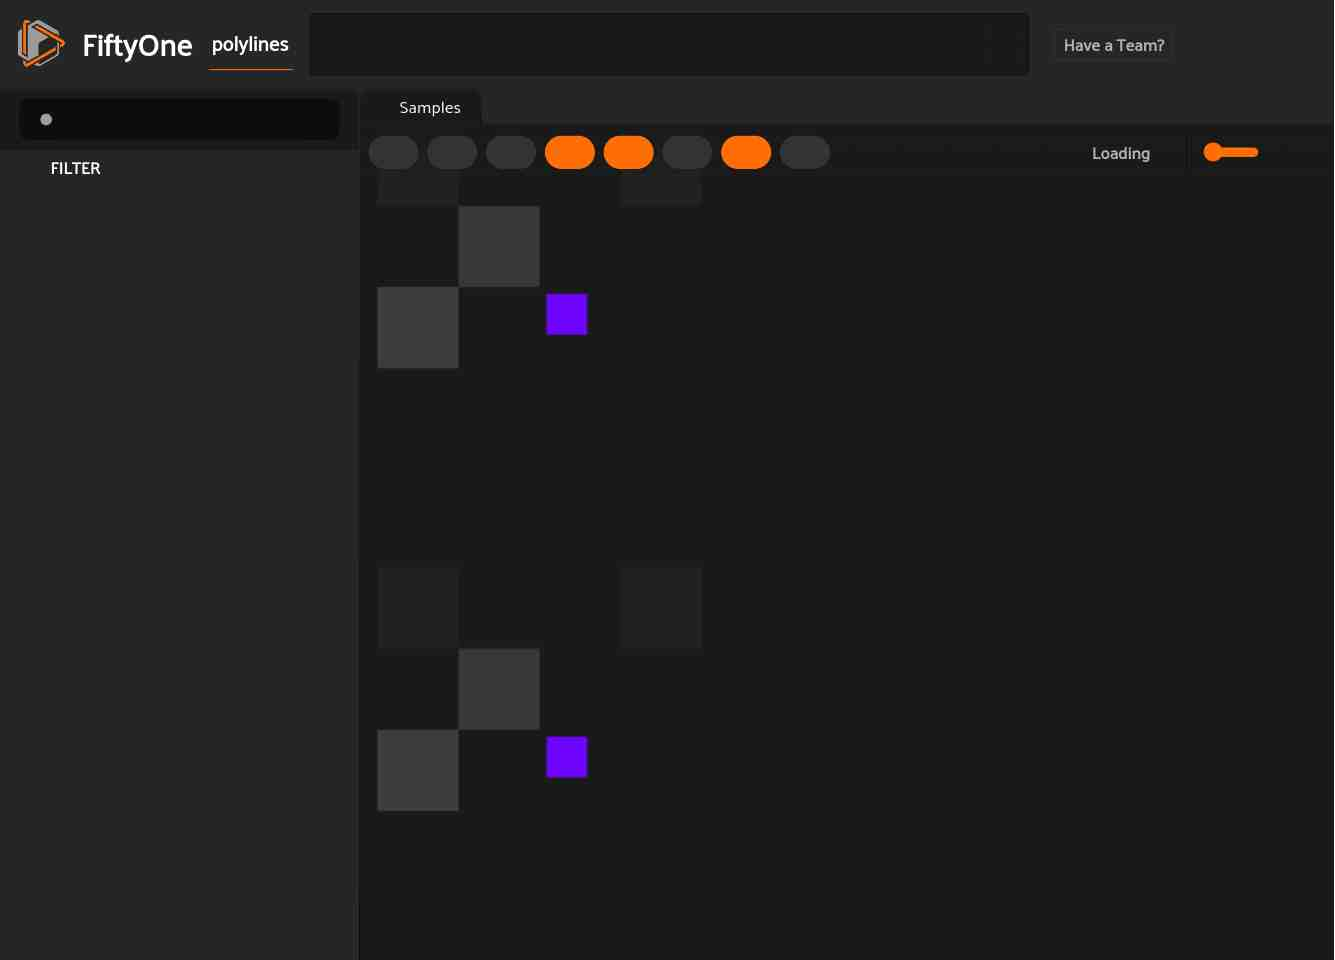


Could not connect session, trying again in 10 seconds



In [51]:
session = fo.launch_app(dataset)

In [52]:
example_view = dataset.match_tags("polylines")
example_view

Dataset:     polylines
Media type:  image
Num samples: 1
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    uniqueness:   fiftyone.core.fields.FloatField
    predictions:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. MatchTags(tags=['polylines'], bool=True, all=False)

In [54]:
sample = example_view.first()

polyline1 = fo.Polyline(
    points=[[(0.3, 0.3), (0.7, 0.3), (0.7, 0.3)]],
    closed=False,
    filled=False,
)

# A closed, filled polygon with a label
polyline2 = fo.Polyline(
    label="triangle",
    points=[[(0.1, 0.1), (0.3, 0.1), (0.3, 0.3)]],
    closed=True,
    filled=True,
    kind="right"
)

sample["polylines"] = fo.Polylines(polylines=[polyline1, polyline2])
sample.save()
example_view.save()


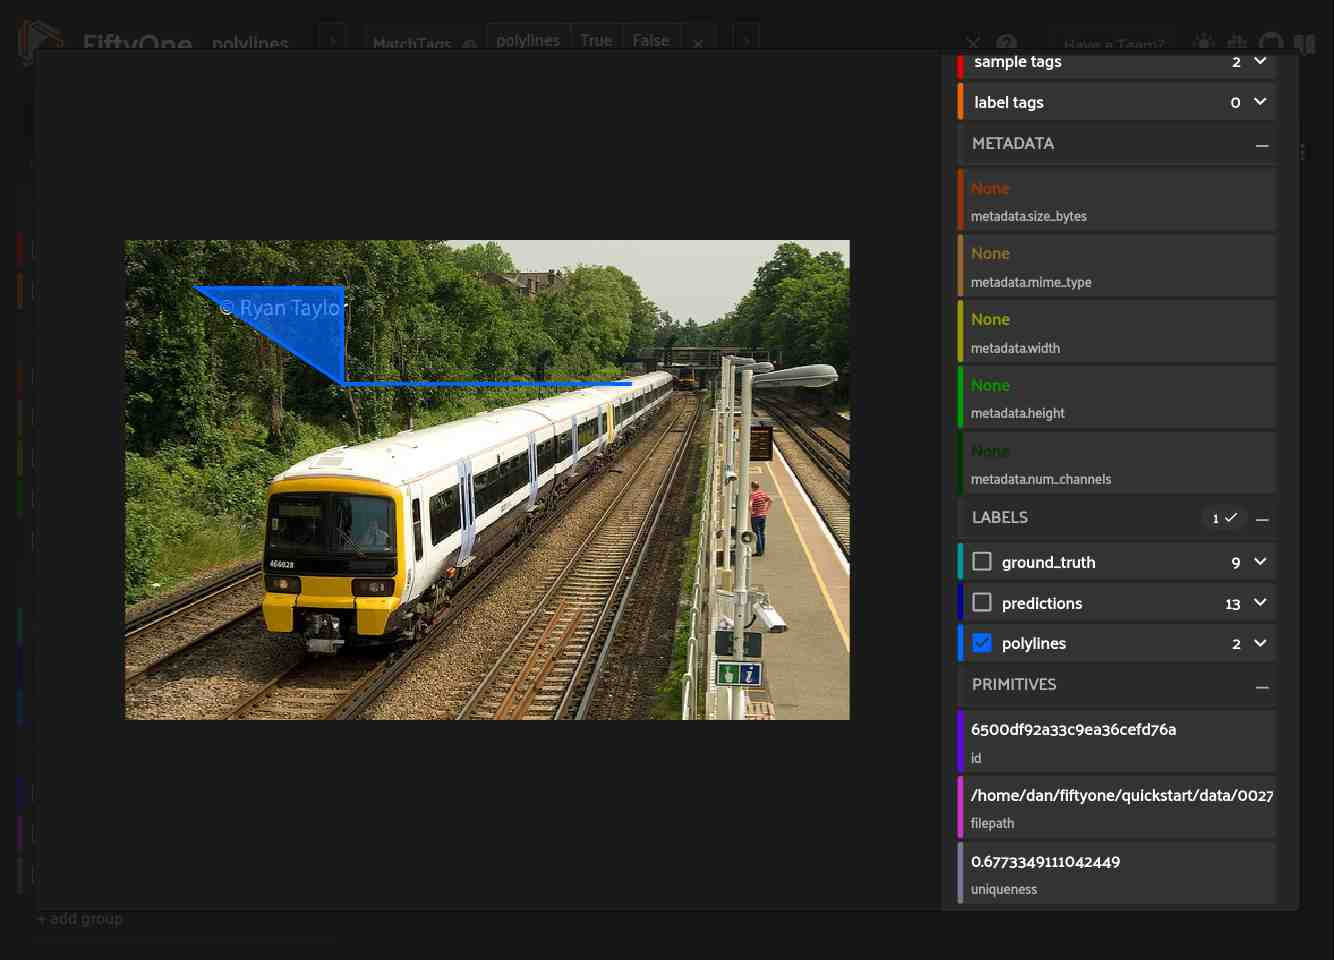

In [55]:
session.view = example_view

In [43]:
del sample["polylines"]
sample.save()


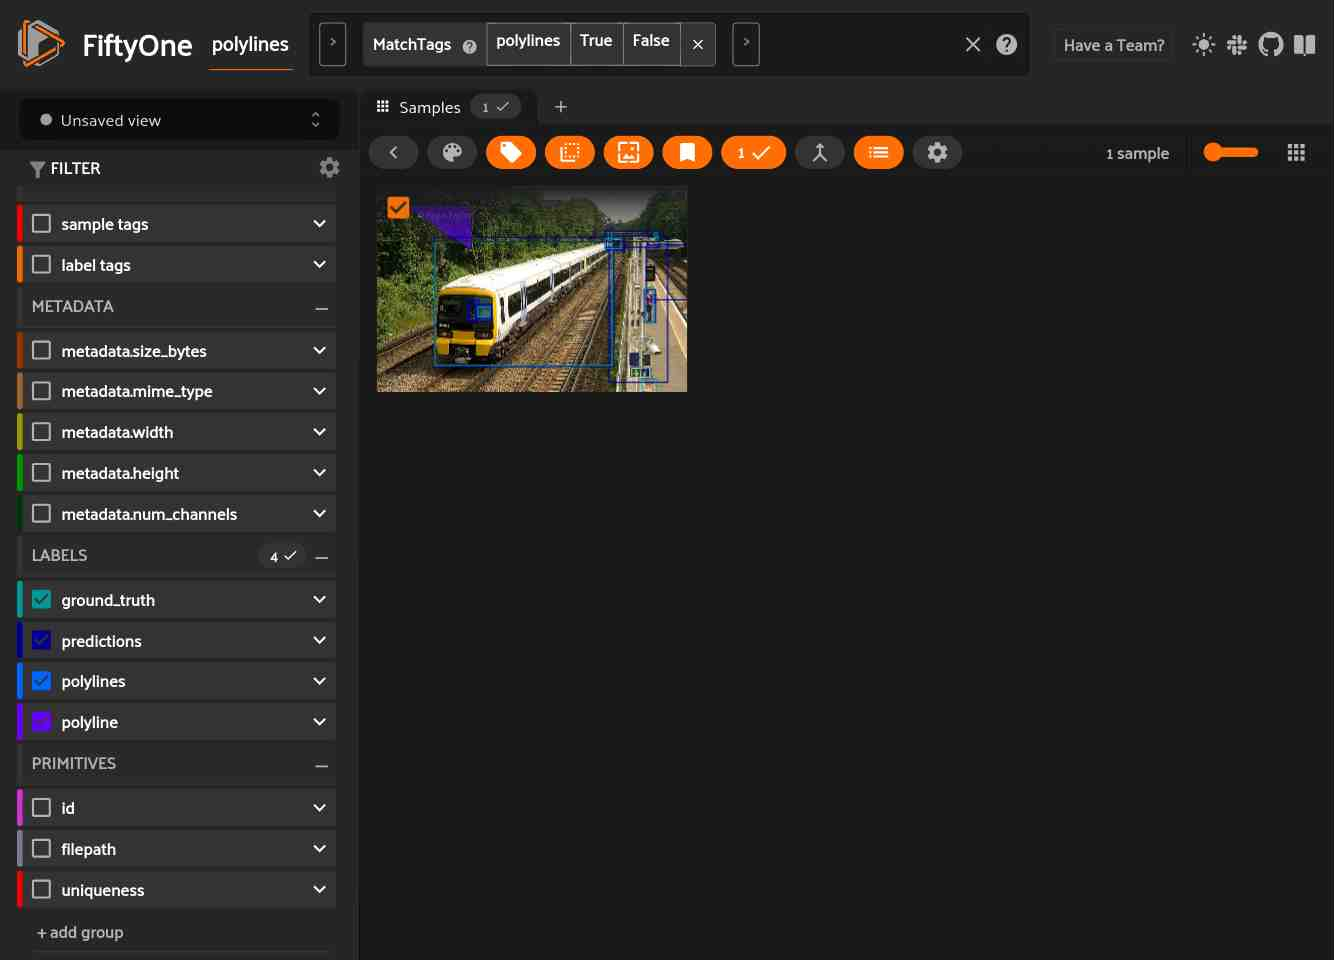

In [45]:
polyline = fo.Polyline(
    label="triangle",
    points=[[(0.1, 0.1), (0.3, 0.1), (0.3, 0.3)]],
    closed=True,
    filled=True,
    kind="right",  # custom attribute
)

sample["polyline"] = polyline
sample.save()
example_view.save()
session.view = example_view


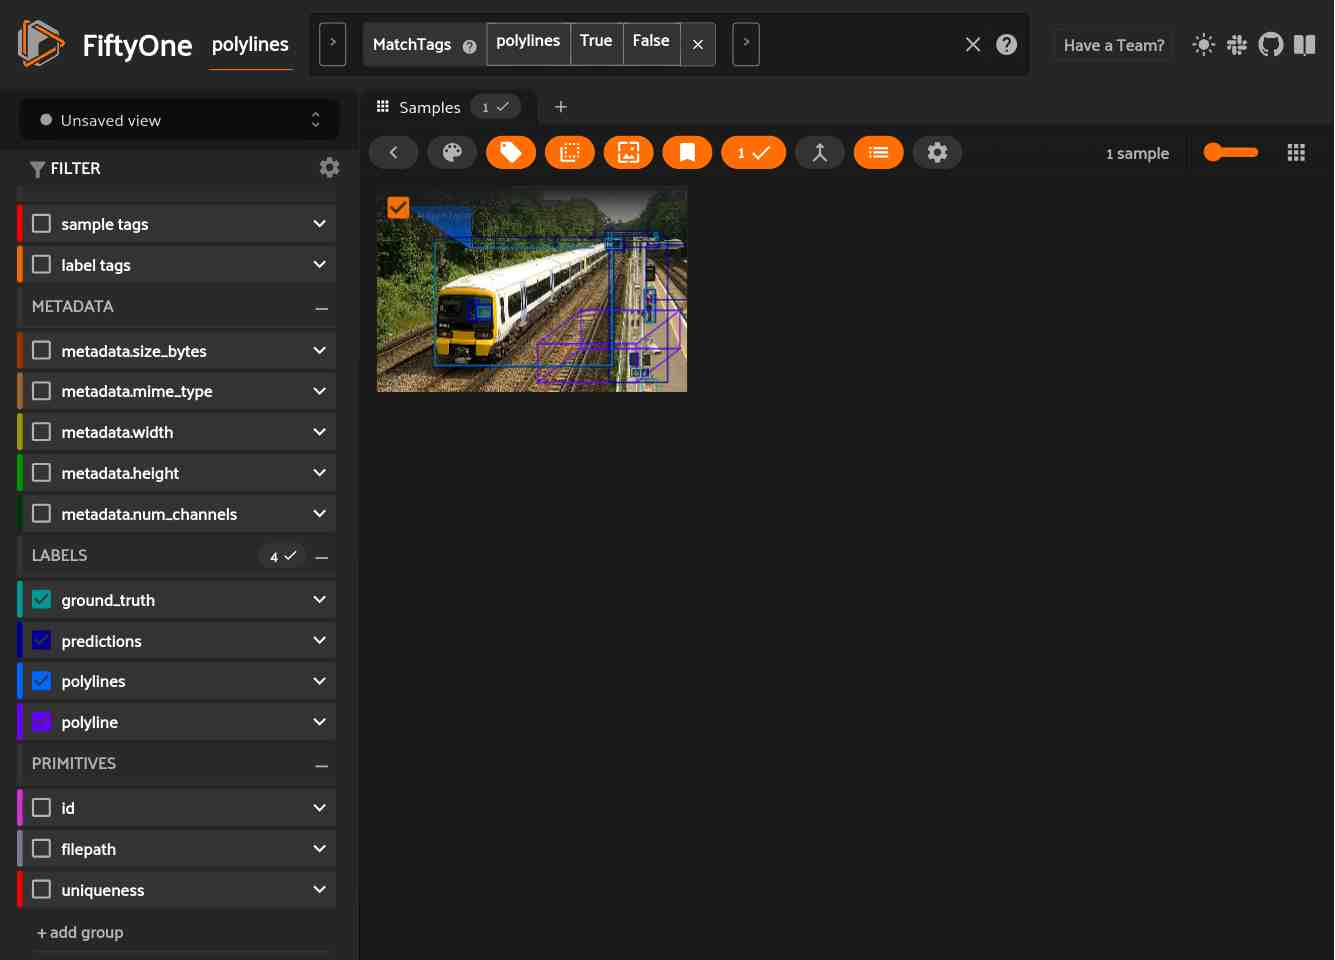

In [59]:
import numpy as np

def random_cuboid():
    x0, y0 = [0, 0.2] + 0.8 * np.random.rand(2)
    dx, dy = (min(0.8 - x0, y0 - 0.2)) * np.random.rand(2)
    x1, y1 = x0 + dx, y0 - dy
    w, h = (min(1 - x1, y1)) * np.random.rand(2)
    front = [(x0, y0), (x0 + w, y0), (x0 + w, y0 - h), (x0, y0 - h)]
    back = [(x1, y1), (x1 + w, y1), (x1 + w, y1 - h), (x1, y1 - h)]
    return fo.Polyline.from_cuboid(front + back, label="cuboid")

sample["polyline"] = random_cuboid()
sample.save()
example_view.save()
session.view = example_view

In [61]:
def random_rotated_box():
    xc, yc = 0.2 + 0.6 * np.random.rand(2)
    w, h = 1.5 * (min(xc, yc, 1 - xc, 1 - yc)) * np.random.rand(2)
    theta = 2 * np.pi * np.random.rand()
    return fo.Polyline.from_rotated_box(xc, yc, w, h, theta, label="box")

sample["polyline"] = random_rotated_box()
sample.save()
example_view.save()
session.view = example_view